In [3]:
# Mô phỏng và Tính toán Lý thuyết M/M/1 Queue

# Import thư viện cần thiết
import random
import queue
import matplotlib.pyplot as plt

# Hàm sinh biến ngẫu nhiên exponential
def exponential(mean):
    return random.expovariate(1.0 / mean)

# Hàm mô phỏng M/M/1
def simulate_mm1(arrival_rate, service_rate, simulation_time):
    current_time = 0
    server_busy = False
    queue_wait = queue.Queue()
    
    total_delay = 0
    num_customers = 0
    arrival_time = exponential(1 / arrival_rate)
    next_departure_time = float('inf')

    times = []
    queue_lengths = []

    while current_time < simulation_time:
        if arrival_time < next_departure_time:
            # Xu ly su kien den
            current_time = arrival_time
            num_customers += 1
            if not server_busy:
                server_busy = True
                service_time = exponential(1 / service_rate)
                next_departure_time = current_time + service_time
            else:
                queue_wait.put(current_time)
            # Lich su kien den tiep theo
            arrival_time = current_time + exponential(1 / arrival_rate)
        else:
            # Xu ly su kien roi
            current_time = next_departure_time
            if not queue_wait.empty():
                arrival_of_waiting_customer = queue_wait.get()
                delay = current_time - arrival_of_waiting_customer
                total_delay += delay
                service_time = exponential(1 / service_rate)
                next_departure_time = current_time + service_time
            else:
                server_busy = False
                next_departure_time = float('inf')

        times.append(current_time)
        queue_lengths.append(queue_wait.qsize() + int(server_busy))

    average_delay = total_delay / num_customers if num_customers > 0 else 0

    plt.plot(times, queue_lengths)
    plt.xlabel('Thoi gian')
    plt.ylabel('So khach trong he thong')
    plt.title('Mo phong hang doi M/M/1')
    plt.grid()
    plt.show()

    return average_delay

# Hàm tính lý thuyết M/M/1
def mm1_theoretical(arrival_rate, service_rate):
    rho = arrival_rate / service_rate
    if rho >= 1:
        raise ValueError("He thong khong on dinh (lambda >= mu).")
    
    L = rho / (1 - rho)
    W = 1 / (service_rate - arrival_rate)
    Lq = rho**2 / (1 - rho)
    Wq = rho / (service_rate - arrival_rate)

    return {
        "He so su dung (rho)": rho,
        "So khach trung binh trong he thong (L)": L,
        "Thoi gian trung binh trong he thong (W)": W,
        "So khach trung binh cho (Lq)": Lq,
        "Thoi gian cho trung binh (Wq)": Wq
    }




In [4]:
# MAIN
if __name__ == "__main__":
    # Thong so dau vao
    arrival_rate = 2.0  # lambda
    service_rate = 3.0  # mu
    simulation_time = 1000  # thoi gian mo phong lon hon de chinh xac hon

    

In [8]:
# Tinh ly thuyet
print("Tinh toan ly thuyet")
results = mm1_theoretical(arrival_rate, service_rate)
for key, value in results.items():
    print(f"{key}: {value:.4f}")

    

Tinh toan ly thuyet
He so su dung (rho): 0.6667
So khach trung binh trong he thong (L): 2.0000
Thoi gian trung binh trong he thong (W): 1.0000
So khach trung binh cho (Lq): 1.3333
Thoi gian cho trung binh (Wq): 0.6667



=== Mo phong ===


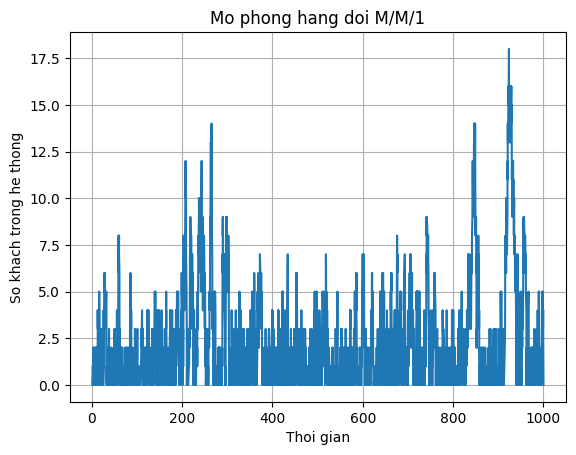

Thoi gian cho trung binh (tu mo phong): 0.7353


In [9]:
# Mo phong
print("\n=== Mo phong ===")
avg_delay = simulate_mm1(arrival_rate, service_rate, simulation_time)
print(f"Thoi gian cho trung binh (tu mo phong): {avg_delay:.4f}")